# PCBのコプレナの特性インピーダンス計算

Conductor 1 charge density range: -1.5341181026086797e-12 -1.8064202278589335e-13
Conductor 1 total charge: -8.791345850445879e-17
Conductor 2 charge density range: 4.875058713561459e-13 1.871292017692767e-12
Conductor 2 total charge: 1.8283514787554817e-16
Conductor 3 charge density range: -1.534118102608677e-12 -1.8064202278587609e-13
Conductor 3 total charge: -8.791345850445872e-17


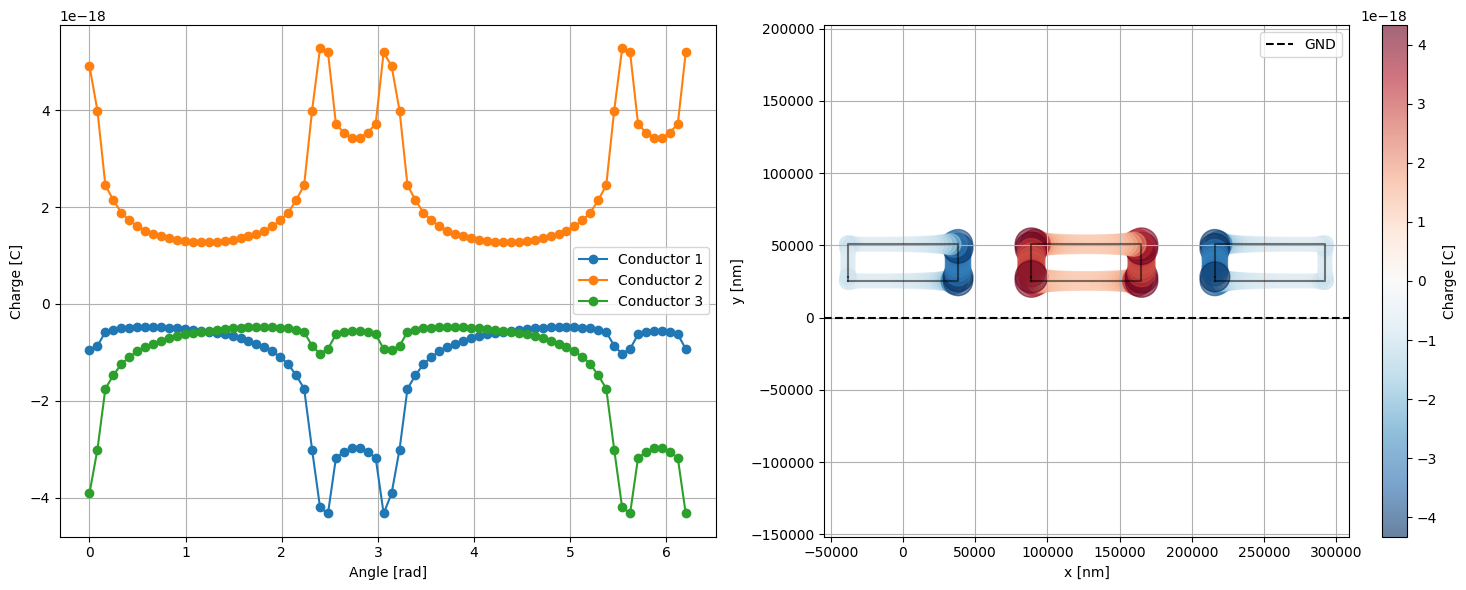

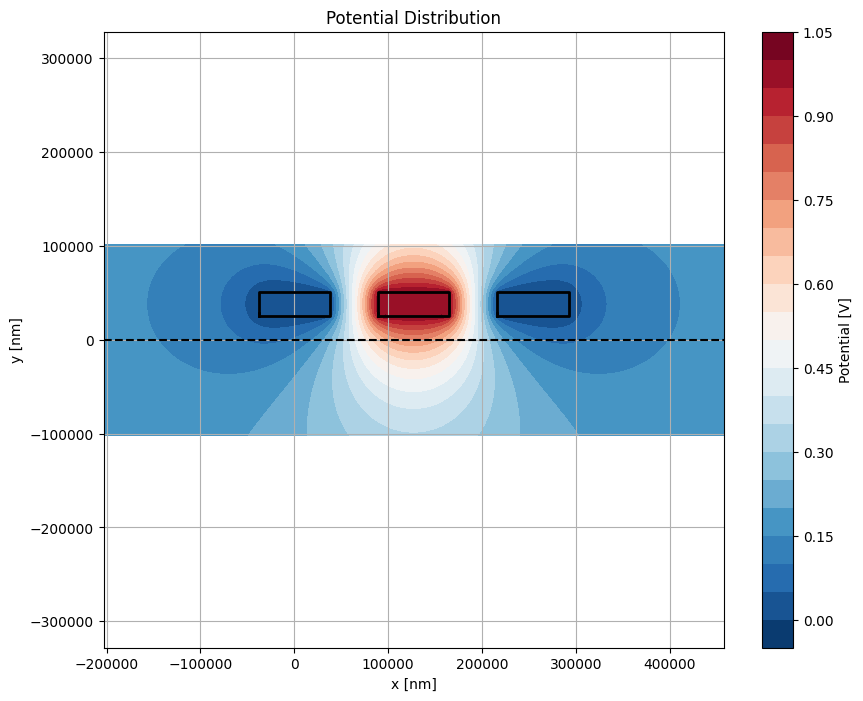

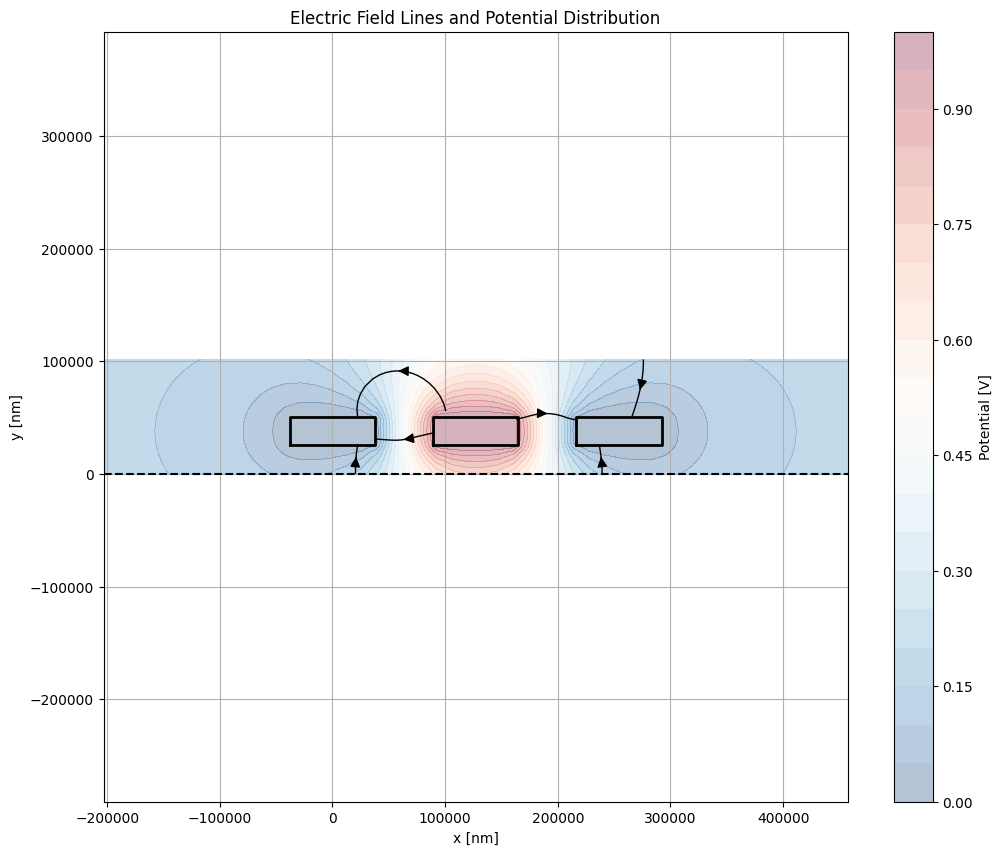


 C Matrix [F/m]:
[[6.76381435e-11]]

 L Matrix [H/m]:
[[3.28993789e-07]]

 Z Matrix [H/m]:
[[69.74258014]]
Conductor 1 charge density range: -1.4087527944371638e-12 -8.497059899285676e-14
Conductor 1 total charge: -6.883647753220793e-17
Conductor 2 charge density range: 6.673231108596759e-13 3.372676573405207e-12
Conductor 2 total charge: 2.623081536981239e-16
Conductor 3 charge density range: -3.3726765734053345e-12 -6.673231108596714e-13
Conductor 3 total charge: -2.6230815369812397e-16
Conductor 4 charge density range: 8.497059899283847e-14 1.4087527944371325e-12
Conductor 4 total charge: 6.883647753220789e-17


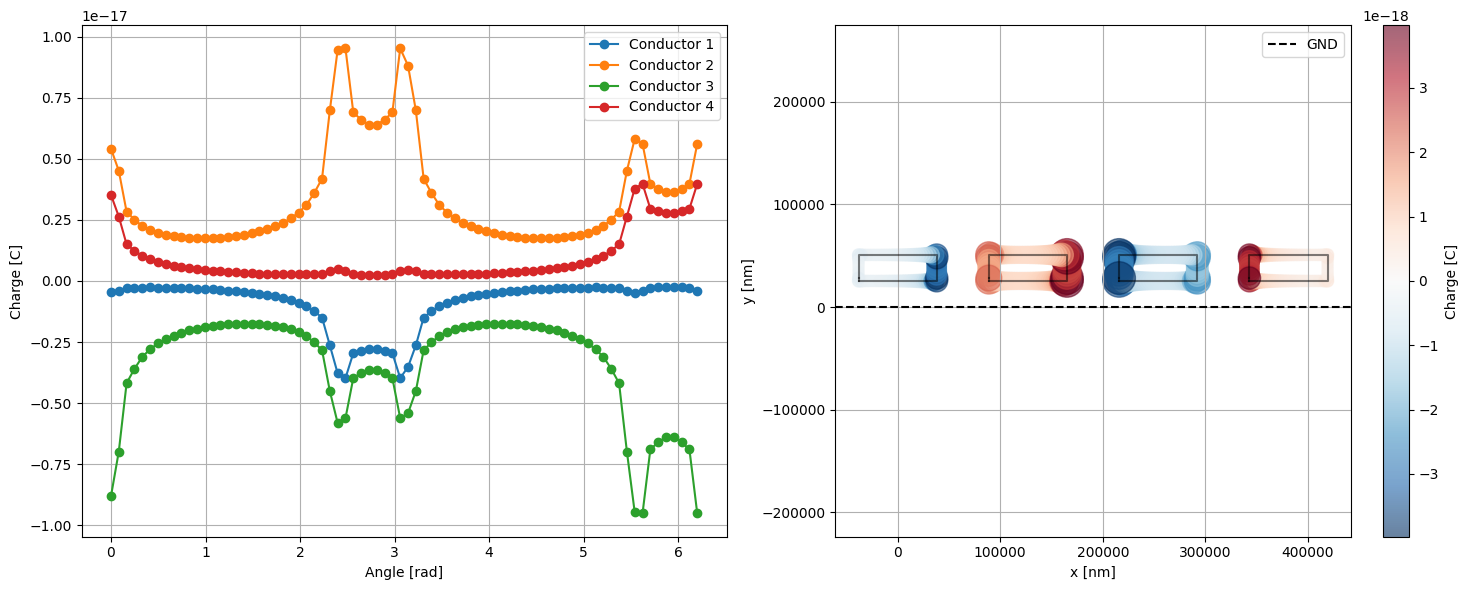

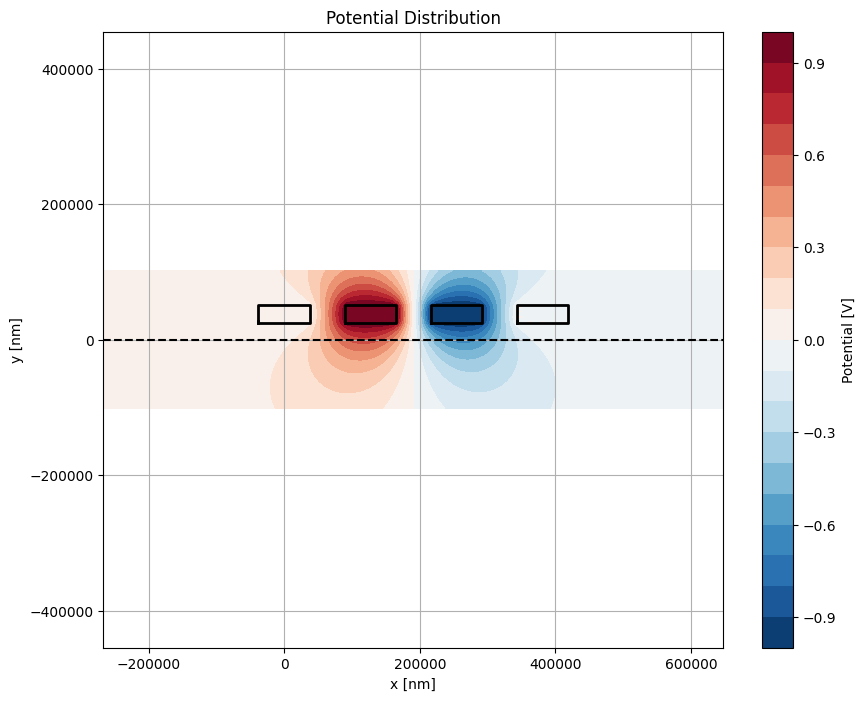

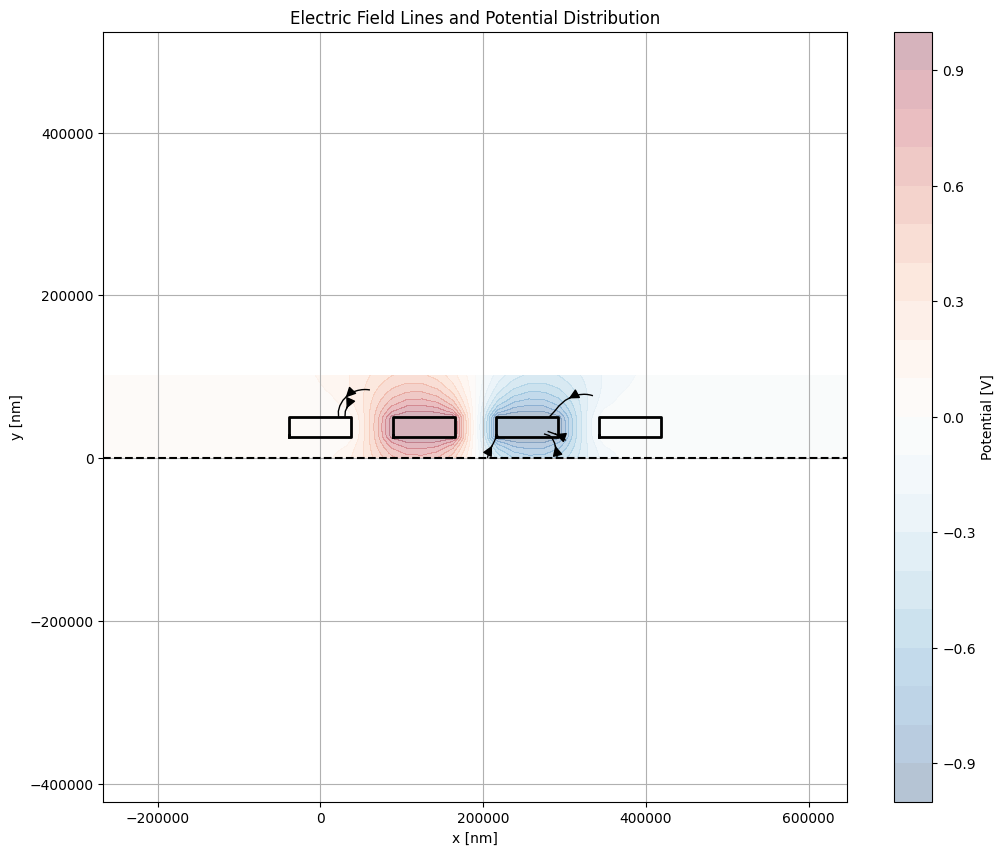


 C Matrix [F/m]:
[[ 6.84913190e-11 -2.85006808e-11]
 [-2.85006808e-11  6.84913190e-11]]

 L Matrix [H/m]:
[[3.92934949e-07 1.63508510e-07]
 [1.63508510e-07 3.92934949e-07]]

 Z Matrix [H/m]:
[[90.22128112 75.98989052]
 [75.98989052 90.22128112]]
Conductor 1 charge density range: -9.072511302409362e-13 -1.6618733588192557e-13
Conductor 1 total charge: -4.9193898219332787e-17
Conductor 2 charge density range: 4.183689488997014e-13 1.309917211240083e-12
Conductor 2 total charge: 1.040209826914733e-16
Conductor 3 charge density range: -9.072511302409345e-13 -1.661873358819297e-13
Conductor 3 total charge: -4.9193898219332744e-17


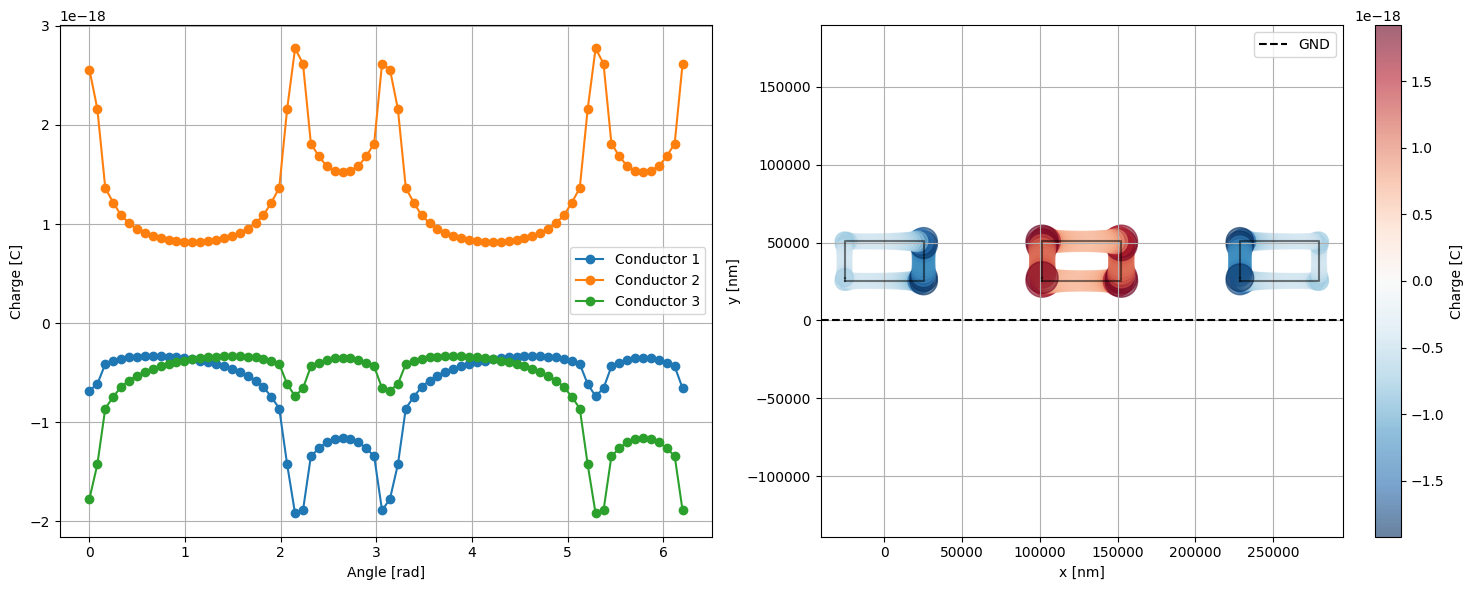

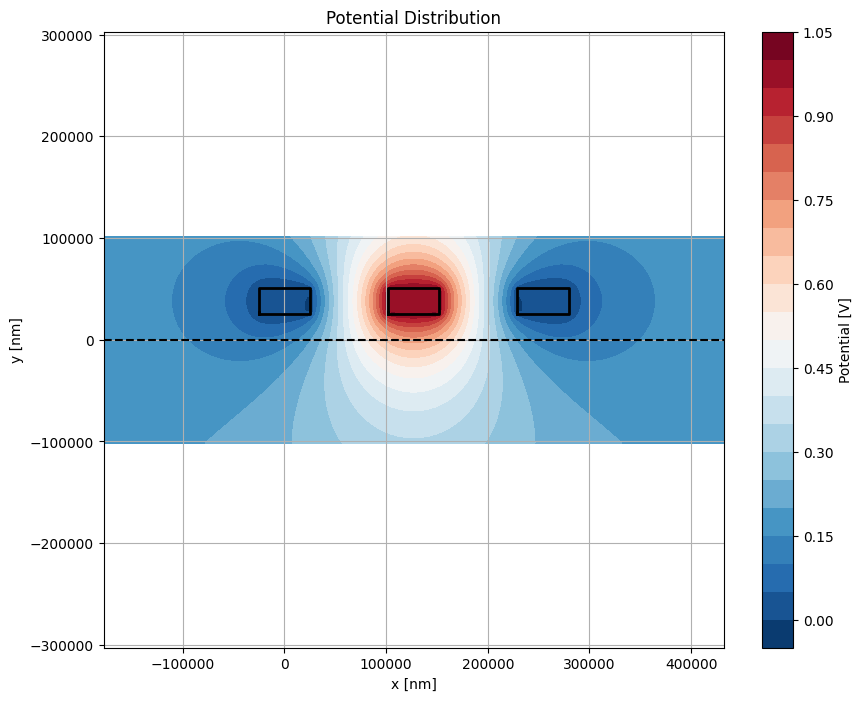

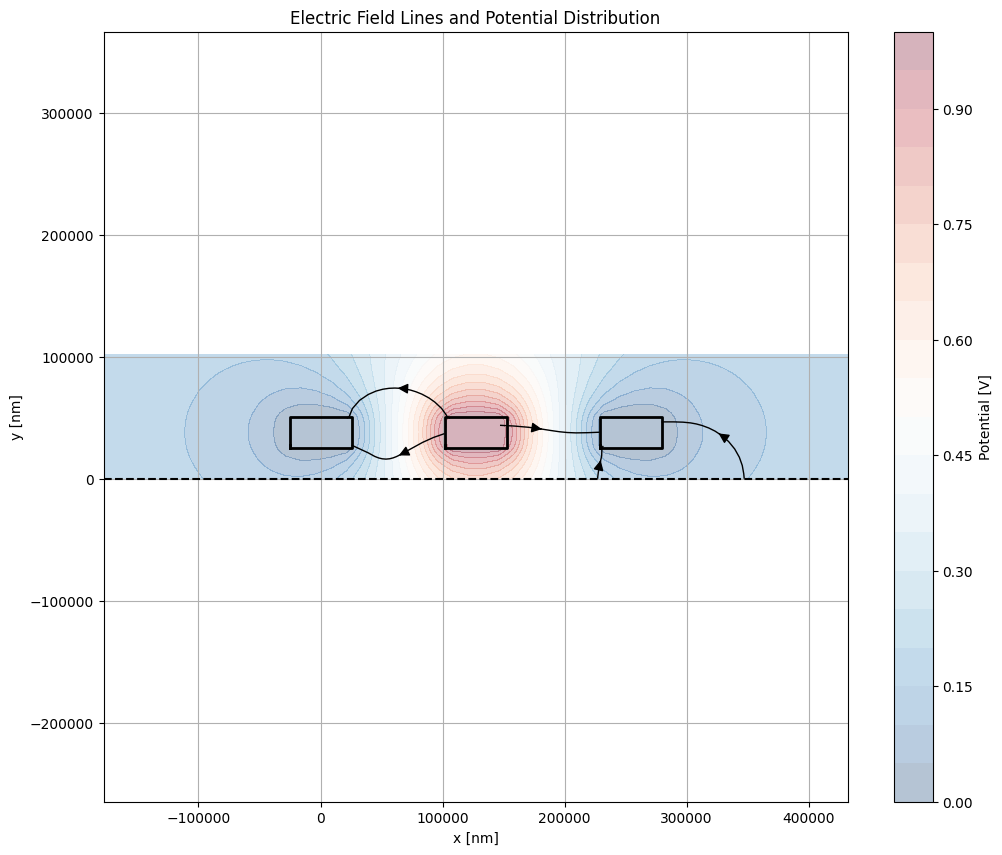


 C Matrix [F/m]:
[[5.14451828e-11]]

 L Matrix [H/m]:
[[4.32548353e-07]]

 Z Matrix [H/m]:
[[91.69485615]]
Conductor 1 charge density range: -1.522516580140547e-12 -1.7077466368803927e-13
Conductor 1 total charge: -8.561507575155101e-17
Conductor 2 charge density range: 4.968836926500167e-13 1.894375422950991e-12
Conductor 2 total charge: 1.8511760535123396e-16
Conductor 3 charge density range: -1.5111045337171161e-12 -6.720319364108765e-14
Conductor 3 total charge: -7.719054834689001e-17
Conductor 4 charge density range: -1.6759758091430071e-13 -6.031254812745294e-14
Conductor 4 total charge: -1.6778598219343103e-17


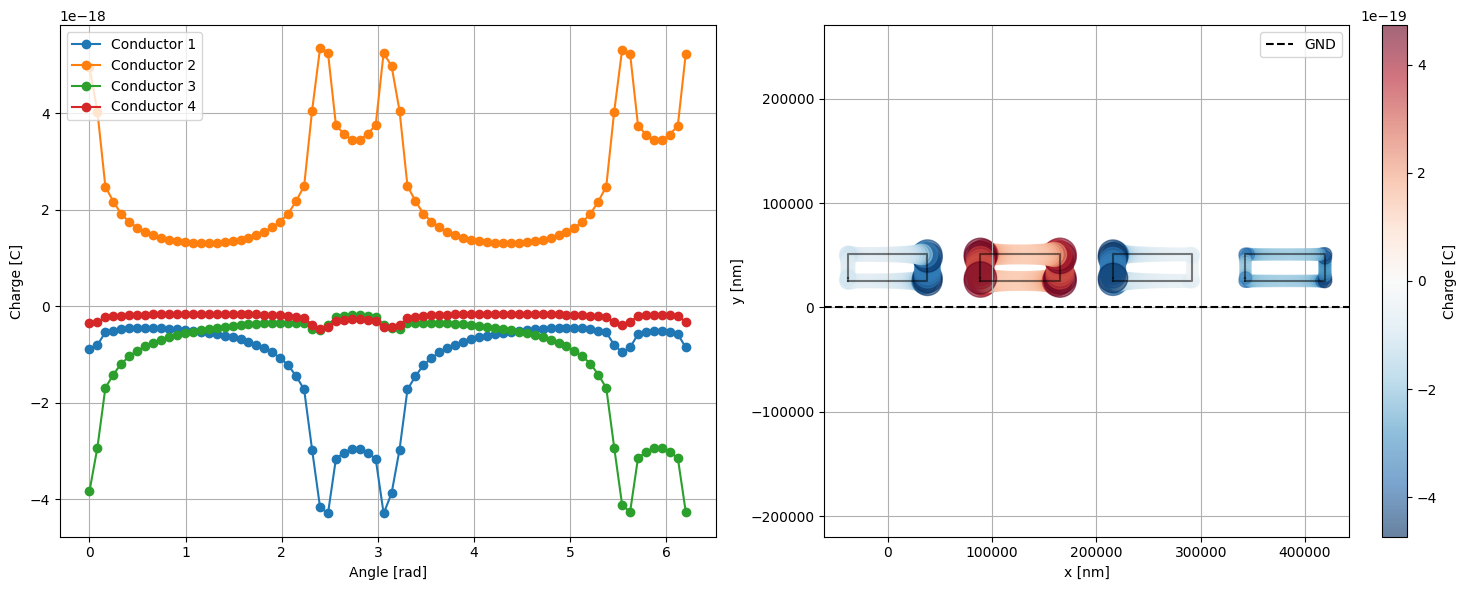

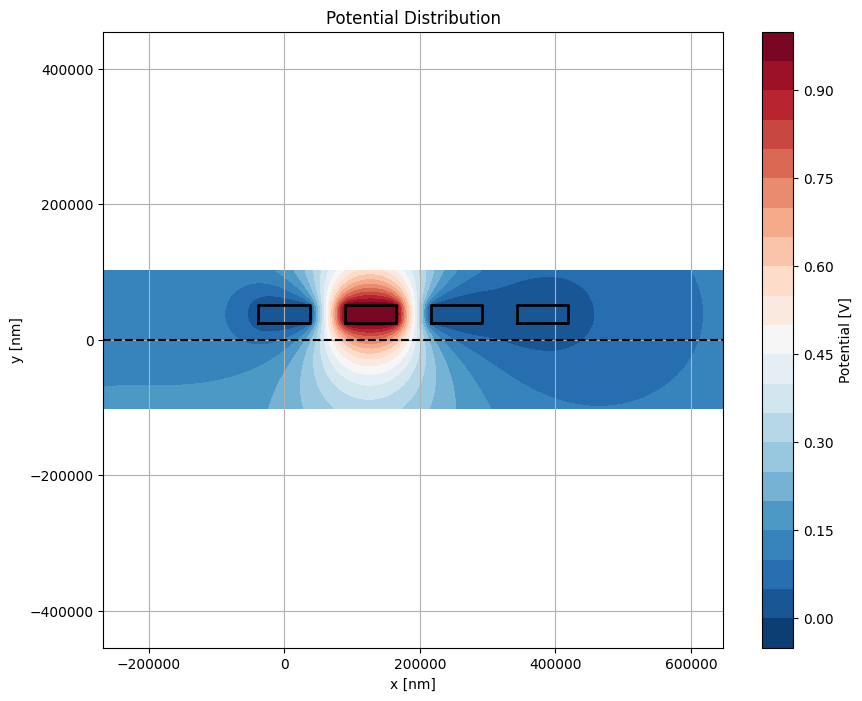

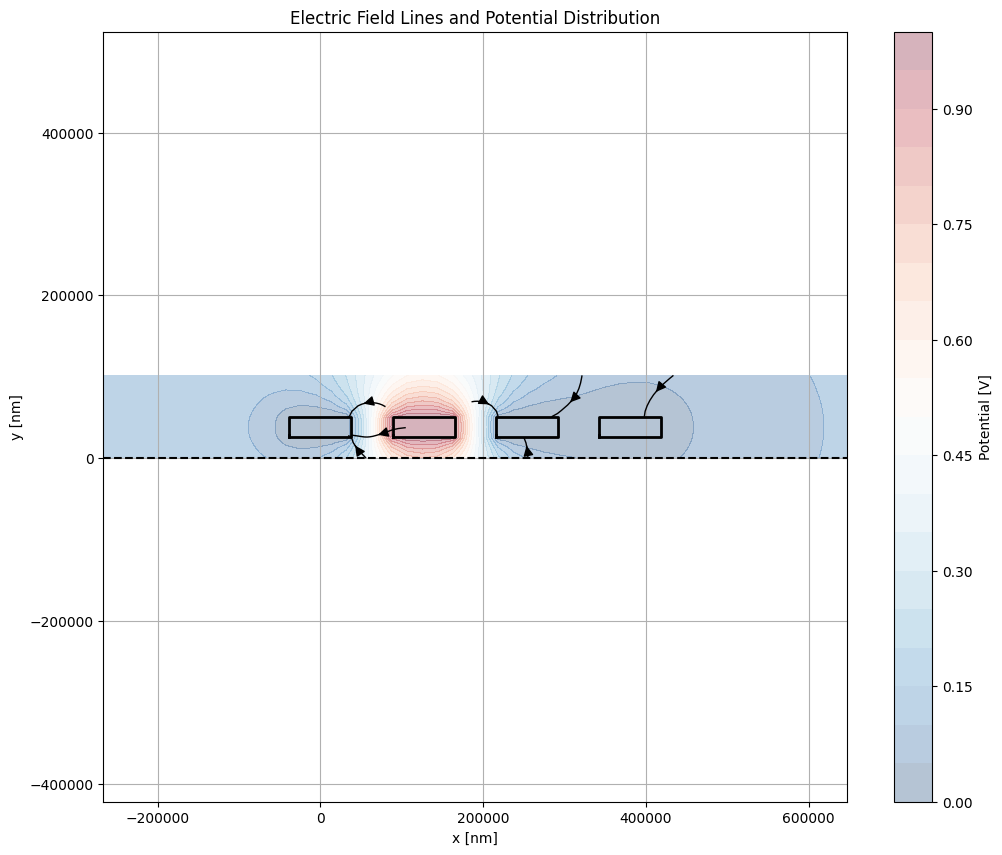


 C Matrix [F/m]:
[[ 6.84913190e-11 -2.85006808e-11]
 [-2.85006808e-11  6.84913190e-11]]

 L Matrix [H/m]:
[[3.92934949e-07 1.63508510e-07]
 [1.63508510e-07 3.92934949e-07]]

 Z Matrix [H/m]:
[[90.22128112 75.98989052]
 [75.98989052 90.22128112]]


In [1]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# PCB Microstrip Line 1導体のテスト
def test_pcb_ms1():
    calculator = MultiConductorCalculator(type="FREE" , epsilon_r=2.0)
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 10mil

    # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  , is_gnd = True)

    # 電圧設定
    voltages = [1.0]

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)

    # 容量行列
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms1_gnd.csv", unit_prefix='p' , length=0.0254 )
 
# PCB Microstrip Line 2導体のテスト
def test_pcb_ms2():
    calculator = MultiConductorCalculator(type="FREE" , epsilon_r=2.0)
    
    w = 7.62e-5  # 2mil
    h = 2.54e-5  # 1mil
    n = 80
    bh1 = 2.54e-5  # 1mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 5mil
    xo4 = 38.1e-5  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  , is_gnd = True)

    # Modified voltages array to match the number of conductors
    voltages = [1.0 ,-1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)


    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms2_gnd.csv", unit_prefix='p' , length=0.0254 )


# StripLineのテスト 1導体
def test_pcb_sp1():
    calculator = MultiConductorCalculator(type="FREE" , epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 5.08e-5  # 20mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 10mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  , is_gnd = True)

    # Modified voltages array to match the number of conductors
    voltages = [1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # pf/inchで出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp1_gnd.csv", unit_prefix='p' , length=0.0254 )


# PCBのテスト 2導体
def test_pcb_sp2():
    calculator = MultiConductorCalculator(type="FREE" , epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 5mil
    xo4 = 38.1e-5  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  , is_gnd = True)
    
    # Modified voltages array to match the number of conductors
    voltages = [1.0, 0.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp2_gnd.csv", unit_prefix='p', length=0.0254)


if __name__ == "__main__":
  test_pcb_ms1()
  test_pcb_ms2()
  test_pcb_sp1()
  test_pcb_sp2()
